In [325]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
import csv
import math



In [295]:
imagePath = '../data/stereoCam/144.jpg'
imagePath_box = '../data/stereoCam/144_box.jpg'
csvPath = '../data/stereoCam/result0.csv'

In [296]:
class objectData:
    def __init__(self,d,x,y,w,h):
        self.d = d
        self.x = x
        self.y = y
        self.w = w
        self.h = h

In [303]:
img = cv2.imread(imagePath)
img_box = cv2.imread(imagePath_box)

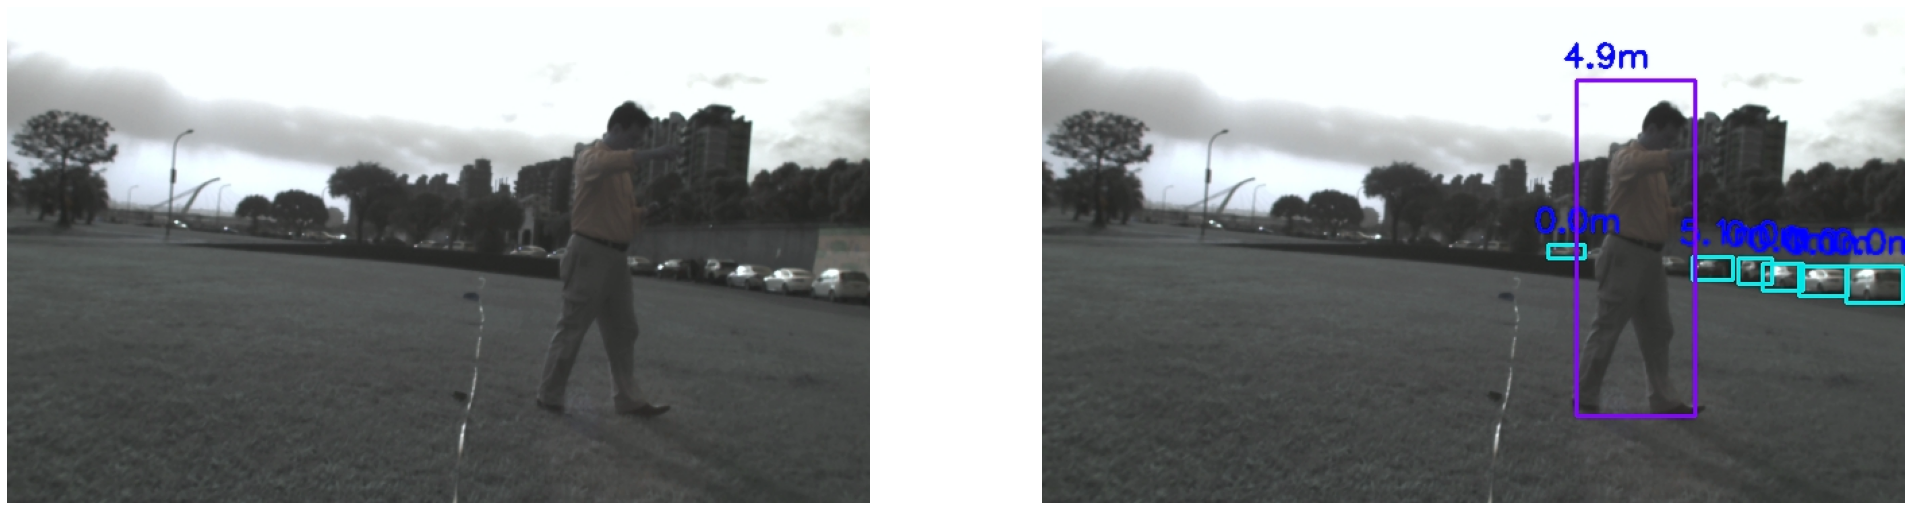

In [451]:
plt.rcParams["figure.figsize"] = (34,12)

plt.subplot(121)
plt.axis('off')
plt.imshow(img)
plt.subplot(122)
plt.axis('off')
plt.imshow(img_box)


In [448]:
def convert2D(pose, scanner1, center, imgW, FOV):
    theta = (pose.x / imgW * FOV) - (FOV / 2)
    theta = theta * math.pi / 180
    pixD = pose.d * scanner1
    object_x = center[0] + (pixD * math.sin(theta))
    object_y = center[1] - (pixD * math.cos(theta))
    return object_x, object_y

In [525]:
map_h = 363
map_w = 640
PI = 3.1415962
m_FOV = 50
step = 20
def drawMap(poses):
    result = np.zeros((map_h, map_w, 3), np.uint8)
    scanner1 = 0
    scanner1 += map_h / step
    scanner1 %= map_h
    scannerlen = 255.0/(map_h / step)
    print(scanner1, scannerlen)
    for i in range(0, int(map_h/ step)):
        center = (int(map_w / 2), map_h)
        axes = (int(i * scanner1), int(i * scanner1))
        angle = 0
        startAngle = -90 + m_FOV / 2
        endAngle = -90 - m_FOV / 2
        color = (255 - i * scannerlen, 255 - i * scannerlen, 255 - i * scannerlen)
        thickness = 2
        cv2.ellipse(result, center, axes, angle, startAngle, endAngle, color, thickness)
    for pose in poses:
        pose_color = (255,153,18)
        startPoseAngle = endAngle + ((pose.x + pose.w) / map_w * m_FOV)
        endPoseAngle =  endAngle + (pose.x / map_w * m_FOV)
        poseAxes = (int(pose.d * scanner1), int(pose.d * scanner1))
        cv2.ellipse(result, center, poseAxes, angle, startPoseAngle, endPoseAngle, pose_color,3)
    for pose in poses:
        pointColor = (225,0,0)        
        object_x, object_y = convert2D(pose, scanner1, center, map_w, m_FOV)
        cv2.circle(result, (int(object_x), int(object_y)), 3, pointColor, -1)
        pose.x += pose.w
        object_x, object_y = convert2D(pose, scanner1, center, map_w, m_FOV)
        cv2.circle(result, (int(object_x), int(object_y)), 3, pointColor, -1)
        w = 85
        h = 12
        cv2.rectangle(result, (int(object_x) + 5, int(object_y + 3)), (int(object_x) + 5 + w, int(object_y + 3) - h), (0,255,0), -1)
        cv2.putText(result, str(pose.d) + 'm person', (int(object_x) + 5, int(object_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 1)
    return result

In [526]:
def getCSV(frameID):
    with open(csvPath, newline='') as csvfile:
        rows = csv.reader(csvfile)
        for row in rows:
            if (row[0] == frameID):
                return objectData(float(row[1]), int(float(row[2])),int(float(row[3])), int(float(row[4])), int(float(row[5])))

In [534]:
pos = getCSV('144')

print(pos.d)
print(pos.x)
print(pos.y)
print(pos.w)
print(pos.h)

4.9
396
54
88
249


18.15 14.049586776859504


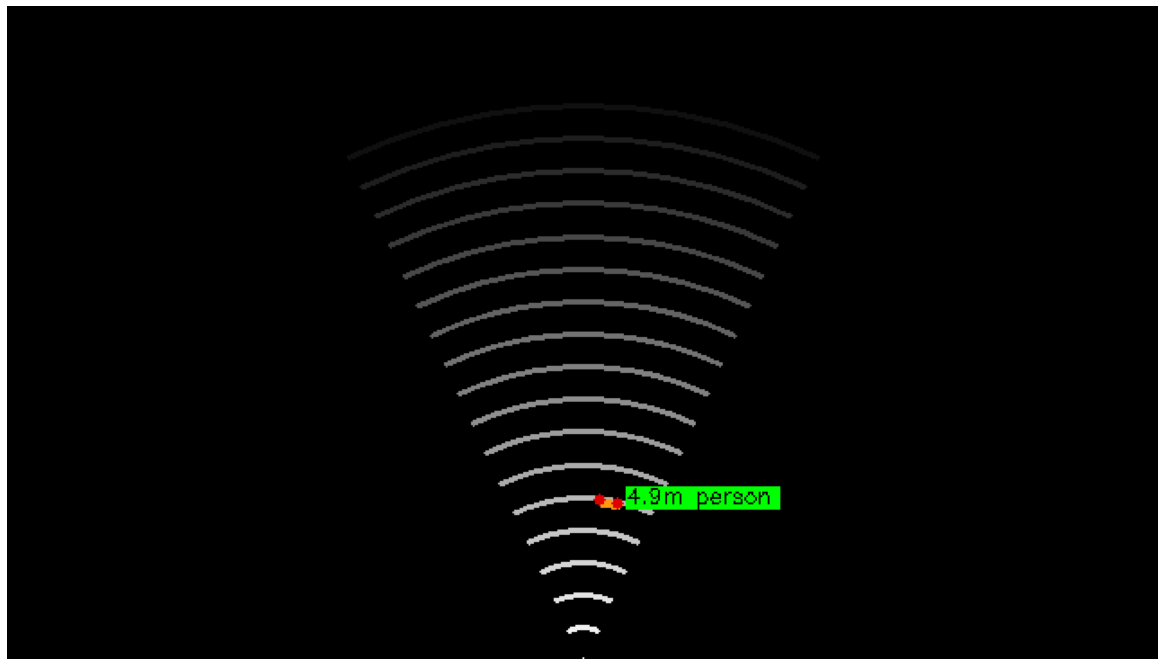

In [528]:
birdview = drawMap([pos])
plt.rcParams["figure.figsize"] = (34,12)
plt.subplot(111)
plt.axis('off')
plt.imshow(birdview)